<a href="https://colab.research.google.com/github/EINSHOWERADMIRAL/EINSHOWERADMIRAL/blob/main/LANGUAGE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv")
print(data.head())

                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


***Let’s have a look at whether this dataset contains any null values or not:***

In [3]:
data.isnull().sum()

,0
Text,0
language,0


***Now let’s have a look at all the languages present in this dataset:***

In [4]:
data["language"].value_counts()

,count
language,
Estonian,1000
Swedish,1000
English,1000
Russian,1000
Romanian,1000
Persian,1000
Pushto,1000
Spanish,1000
Hindi,1000


***This dataset contains 22 languages with 1000 sentences from each language. This is a very balanced dataset with no missing values, so we can say this dataset is completely ready to be used to train a machine learning model.***

**Language Detection Model**

*Now let’s split the data into training and test sets:*

In [6]:
x = np.array(data["Text"])
y = np.array(data["language"])
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=42)

In [7]:
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.953168044077135

In [9]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: देखकर अच्छा लगता है
['Hindi']


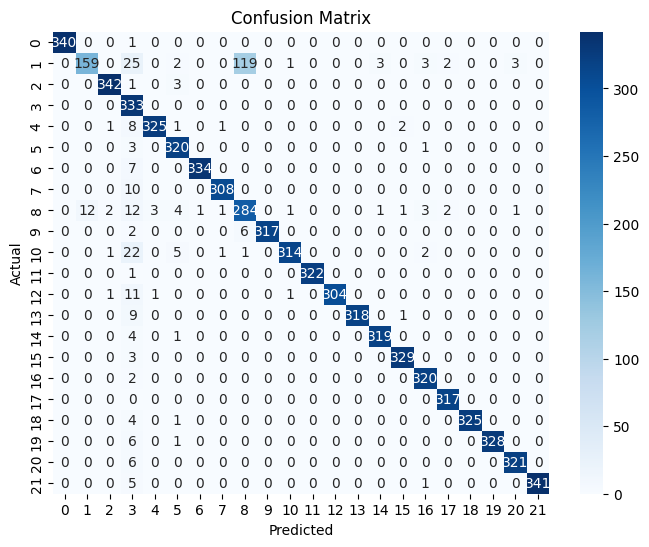

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<ipython-input-16-b9b445bc098b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette="viridis")


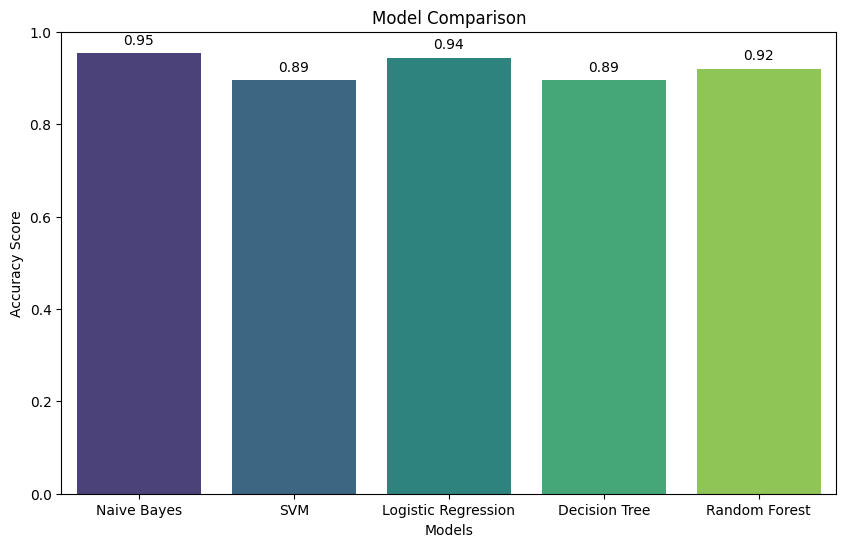

In [16]:
from sklearn.svm import SVC  # Corrected import statement
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Assuming X_train, X_test, y_train, and y_test are already defined
models = [
    ("Naive Bayes", MultinomialNB()),
    ("SVM", SVC()),
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier())
]

scores = {}
for name, m in models:
    m.fit(X_train, y_train)
    scores[name] = m.score(X_test, y_test)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette="viridis")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.ylim(0, 1)  # Assuming accuracy scores are between 0 and 1
for idx, score in enumerate(scores.values()):
    plt.text(idx, score + 0.02, f"{score:.2f}", ha='center', color='black')
plt.show()

<ipython-input-17-5b9778967286>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x="importance", y="feature", palette="magma")


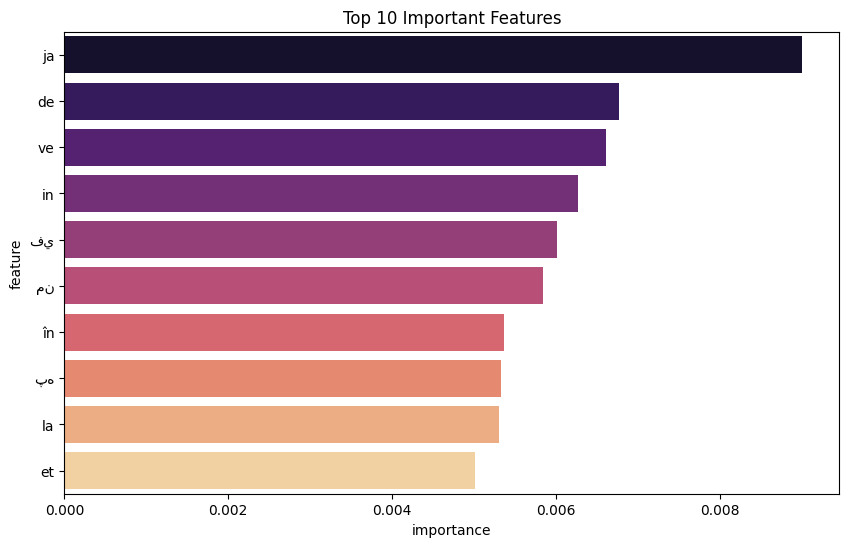

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
features = cv.get_feature_names_out()
feature_importance_df = pd.DataFrame({"feature": features, "importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x="importance", y="feature", palette="magma")
plt.title("Top 10 Important Features")
plt.show()

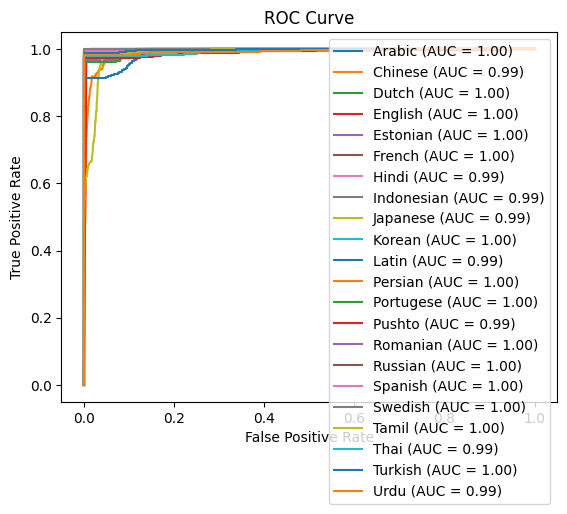

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes=model.classes_)
predictions_prob = model.predict_proba(X_test)

for i, class_name in enumerate(model.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], predictions_prob[:, i])
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {auc(fpr, tpr):.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

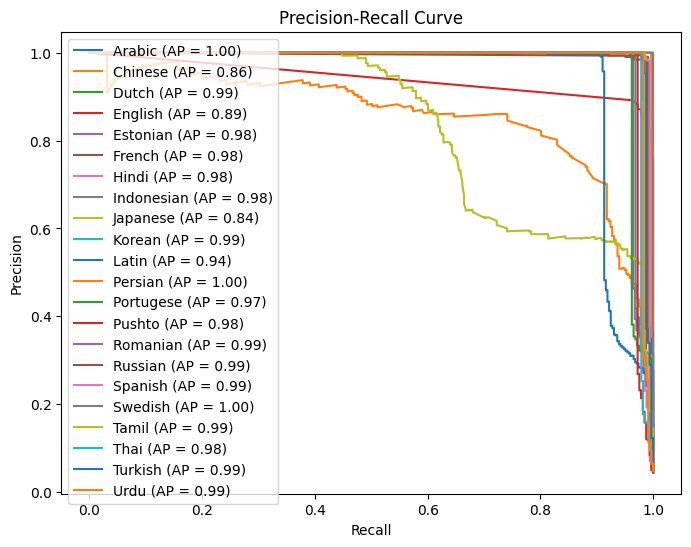

In [18]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))
for i, class_name in enumerate(model.classes_):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], predictions_prob[:, i])
    avg_precision = average_precision_score(y_test_binarized[:, i], predictions_prob[:, i])
    plt.plot(recall, precision, label=f"{class_name} (AP = {avg_precision:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

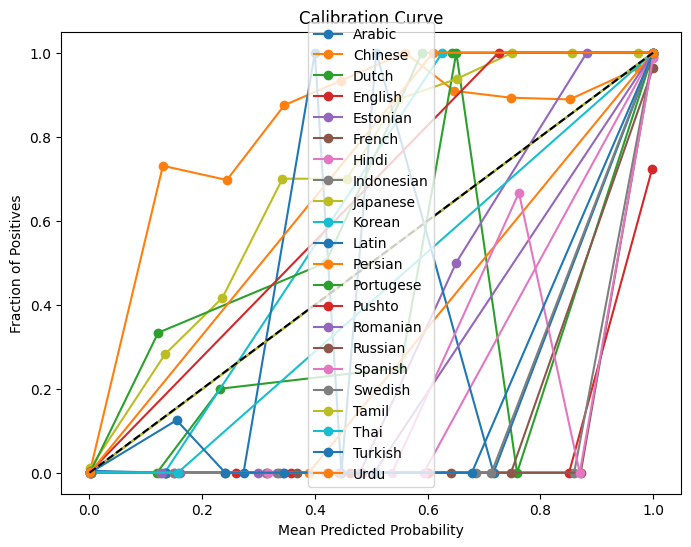

In [21]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(8, 6))
for i, class_name in enumerate(model.classes_):
    prob_true, prob_pred = calibration_curve(y_test_binarized[:, i], predictions_prob[:, i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker="o", label=f"{class_name}")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.legend(loc="best")
plt.show()